## References

https://gym.openai.com/evaluations/eval_EIcM1ZBnQW2LBaFN6FY65g/, https://keon.io/deep-q-learning/ and http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/15%20Reinforcement%20Learning%20for%20Two-Player%20Games.ipynb

## Import Libraries

In [22]:
import numpy as np
import math
import gym
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random
import matplotlib.pyplot as plt

## Define Functions

In [23]:
import random
def winnerState(meanScore,iteration):
    '''Check whether the mean score for last 100 iterations
    is greater than or equal to 195 time steps. 
    If it is, winning state that is the cart pole 
    is held upright for more than 200 time steps', is reached.'''
    if meanScore >= 195 and iteration >= 100:
        return 1
    else:
        return 0

def epsilonGreedy(epsilon, dqnetwork, state):    
    '''Returns random move or greedy move based on epsilon value.
    At the beginning, random actions are chosen as the agent has not learnt 
    the best moves to keep the cart-pole upright. Once it is trained, actions 
    with highest rewards are considered.'''
    if (np.random.random() <= epsilon):
        action = env.action_space.sample()
    else:
        action = np.argmax(dqnetwork.predict(state))
    return action

def iterate(batch,memory,exploration_rate,min_exploration_rate,exploration_rate_decay,dqnetwork):
    xBatch = []
    yBatch = []
    minibatch = random.sample(memory, min(len(memory), batch))    # Get random Sample frm memory
    for state, action, reward, next_state, done in minibatch:
            yTarget = dqnetwork.predict(state)
            # Define Target
            yTarget[0][action] = reward if done else reward + gamma * np.max(dqnetwork.predict(next_state)[0])
            xBatch.append(state[0])
            yBatch.append(yTarget[0])
    # Train the network
    dqnetwork.fit(np.array(xBatch), np.array(yBatch), batch_size=len(xBatch), verbose=0)
    if exploration_rate > min_exploration_rate:
            exploration_rate *= exploration_rate_decay
            
def trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize):
    adaDivisor=25
    quiet=False
    env=gym.make('CartPole-v0')   # Open AI environment for Cart Pole
    memory = deque(maxlen=100000)
    
    '''Build Deep Q Network having 4 input layer dimensions, 2 output layer dimensions 
    and 2 hidden layers of 24 and 48 nodes'''
    dqnetwork = Sequential()
    dqnetwork.add(Dense(24, input_dim=4, activation='tanh'))
    dqnetwork.add(Dense(48, activation='tanh'))
    dqnetwork.add(Dense(2, activation='linear'))
    dqnetwork.compile(loss='mse', optimizer=Adam(lr=learning_rate, decay=learning_rate_decay))
    
    scores = deque(maxlen=100)
    scorePlot=[]
    runs=[]
    for i in range(nEpisodes):
            state = np.reshape(env.reset(), [1, 4])
            done = False
            score = 0
            while not done:
                epsilon=max(min_exploration_rate, min(exploration_rate, 1.0 - math.log10((i + 1) * exploration_rate_decay)))
                move = epsilonGreedy(epsilon, dqnetwork, state)      # get the move
                newState, rewards, done, _ = env.step(move)          # apply the move and get new state
                newState = np.reshape(newState, [1, 4])
                memory.append((state, move, rewards, newState, done))   # store experiences in memory
                state = newState
                score += 1
            scores.append(score)
            scorePlot.append(score)
            runs.append(i)
            meanScore = np.mean(scores)
            #print('Episode',episode)
            if winnerState(meanScore,i):
                print('Ran {} iterations. Trained after {} trials ✔'.format(i, i - 100))
                plt.plot(runs,scorePlot)
                plt.title('Training Plot-Scores over episodes')
                plt.xlabel('Episodes')
                plt.ylabel('Scores')
                plt.show()
                return dqnetwork
            if i % 100 == 0 and not quiet: 
                print('[Iteration {}] - Mean survival time was {} ticks.'.format(i, meanScore))
            iterate(batchSize,memory,exploration_rate,min_exploration_rate,exploration_rate_decay,dqnetwork)
    if not quiet: 
        print('Did not solve after {} iterations'.format(i))
        return i     


def testQ(dqnetwork):    
    scores = deque(maxlen=100)
    nWinTicks=195
    env=gym.make('CartPole-v0')
    epsilon=0
    run=[]
    for i in range(0,10):
        run.append(i)
        state = np.reshape(env.reset(), [1, 4])
        maxMoves=10000
        done= False
        score=0
        while not done:
            move = epsilonGreedy(epsilon, dqnetwork, state)
            newState, rewards, done, _ = env.step(move)
            newState = np.reshape(newState, [1, 4])
            #memory.append((state, move, rewards, newState, done))
            #print('Memory',memory)
            state = newState
            score += 1
        scores.append(score)
        meanScore = np.mean(scores)
        if meanScore >= nWinTicks:
            print('Mean Survival Time for ',i+1,' iteration is ',meanScore,' ticks.')
    plt.plot(run,scores)
    plt.title('Testing Plot-Scores over episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Scores')
    plt.show()

## Experiment 1

Instructions for updating:
keep_dims is deprecated, use keepdims instead
[Iteration 0] - Mean survival time was 9.0 ticks.
[Iteration 100] - Mean survival time was 35.92 ticks.
[Iteration 200] - Mean survival time was 161.39 ticks.
[Iteration 300] - Mean survival time was 167.88 ticks.
[Iteration 400] - Mean survival time was 184.99 ticks.
[Iteration 500] - Mean survival time was 180.21 ticks.
[Iteration 600] - Mean survival time was 188.86 ticks.
Ran 667 iterations. Trained after 567 trials ✔


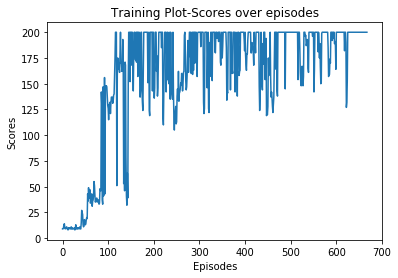

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


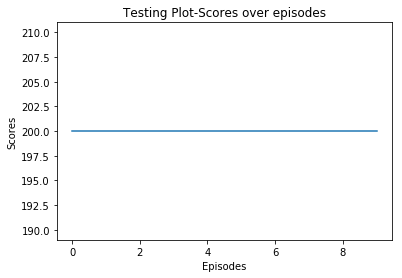

In [4]:
learning_rate=0.01
learning_rate_decay=0.001
exploration_rate=0.1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
testQ(dqnetwork)

## Experiment 2

[Iteration 0] - Mean survival time was 9.0 ticks.
[Iteration 100] - Mean survival time was 17.87 ticks.
[Iteration 200] - Mean survival time was 119.41 ticks.
[Iteration 300] - Mean survival time was 162.94 ticks.
[Iteration 400] - Mean survival time was 183.97 ticks.
Ran 463 iterations. Trained after 363 trials ✔


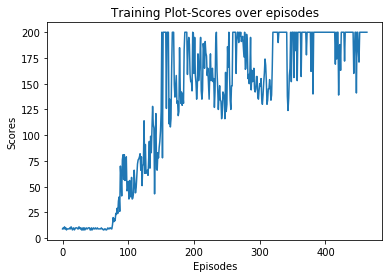

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


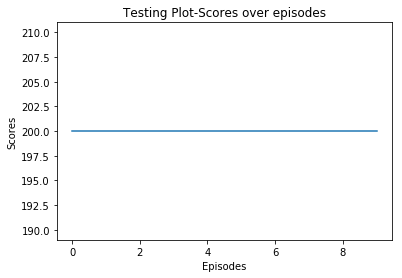

In [5]:
learning_rate=0.01
learning_rate_decay=0.01
exploration_rate=0.1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
testQ(dqnetwork)

## Experiment 3

In [16]:
learning_rate=0.001
learning_rate_decay=0.01
exploration_rate=0.1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

[Iteration 0] - Mean survival time was 9.0 ticks.
[Iteration 100] - Mean survival time was 9.39 ticks.
[Iteration 200] - Mean survival time was 9.37 ticks.
[Iteration 300] - Mean survival time was 9.46 ticks.
[Iteration 400] - Mean survival time was 9.52 ticks.
[Iteration 500] - Mean survival time was 9.49 ticks.
[Iteration 600] - Mean survival time was 9.44 ticks.
[Iteration 700] - Mean survival time was 9.47 ticks.
[Iteration 800] - Mean survival time was 9.31 ticks.
[Iteration 900] - Mean survival time was 9.44 ticks.
Did not solve after 999 iterations


## Experiment 4

In [19]:
learning_rate=0.01
learning_rate_decay=0.01
exploration_rate=0.01
min_exploration_rate=0.001
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

[Iteration 0] - Mean survival time was 8.0 ticks.
[Iteration 100] - Mean survival time was 9.38 ticks.
[Iteration 200] - Mean survival time was 9.35 ticks.
[Iteration 300] - Mean survival time was 9.45 ticks.
[Iteration 400] - Mean survival time was 9.32 ticks.
[Iteration 500] - Mean survival time was 9.43 ticks.
[Iteration 600] - Mean survival time was 9.27 ticks.
[Iteration 700] - Mean survival time was 9.41 ticks.
[Iteration 800] - Mean survival time was 9.35 ticks.
[Iteration 900] - Mean survival time was 9.46 ticks.
Did not solve after 999 iterations


## Experiment 5

[Iteration 0] - Mean survival time was 68.0 ticks.
[Iteration 100] - Mean survival time was 104.64 ticks.
[Iteration 200] - Mean survival time was 183.36 ticks.
Ran 236 iterations. Trained after 136 trials ✔


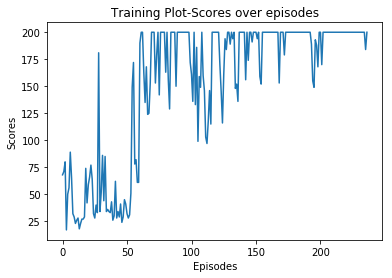

In [18]:
learning_rate=0.01
learning_rate_decay=0.01
exploration_rate=0.5
min_exploration_rate=0.001
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

## Experiment 6

[Iteration 0] - Mean survival time was 19.0 ticks.
[Iteration 100] - Mean survival time was 52.6 ticks.
[Iteration 200] - Mean survival time was 103.97 ticks.
[Iteration 300] - Mean survival time was 182.6 ticks.
[Iteration 400] - Mean survival time was 170.07 ticks.
[Iteration 500] - Mean survival time was 185.07 ticks.
[Iteration 600] - Mean survival time was 190.31 ticks.
Ran 640 iterations. Trained after 540 trials ✔


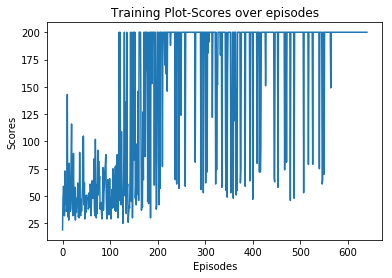

In [20]:
learning_rate=0.1
learning_rate_decay=0.01
exploration_rate=0.1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=2000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

## Experiment 7

In [25]:
learning_rate=0.5
learning_rate_decay=0.01
exploration_rate=0.1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

[Iteration 0] - Mean survival time was 9.0 ticks.
[Iteration 100] - Mean survival time was 9.47 ticks.
[Iteration 200] - Mean survival time was 9.45 ticks.
[Iteration 300] - Mean survival time was 9.33 ticks.
[Iteration 400] - Mean survival time was 9.37 ticks.
[Iteration 500] - Mean survival time was 11.25 ticks.
[Iteration 600] - Mean survival time was 14.13 ticks.
[Iteration 700] - Mean survival time was 19.34 ticks.
[Iteration 800] - Mean survival time was 27.21 ticks.
[Iteration 900] - Mean survival time was 54.86 ticks.
Did not solve after 999 iterations


## Experiment 8

In [27]:
learning_rate=0.01
learning_rate_decay=0.1
exploration_rate=0.1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

[Iteration 0] - Mean survival time was 9.0 ticks.
[Iteration 100] - Mean survival time was 10.0 ticks.
[Iteration 200] - Mean survival time was 11.05 ticks.
[Iteration 300] - Mean survival time was 13.64 ticks.
[Iteration 400] - Mean survival time was 14.19 ticks.
[Iteration 500] - Mean survival time was 15.47 ticks.
[Iteration 600] - Mean survival time was 16.51 ticks.
[Iteration 700] - Mean survival time was 17.55 ticks.
[Iteration 800] - Mean survival time was 17.28 ticks.
[Iteration 900] - Mean survival time was 17.08 ticks.
Did not solve after 999 iterations


## Experiment 9

[Iteration 0] - Mean survival time was 16.0 ticks.
[Iteration 100] - Mean survival time was 85.24 ticks.
[Iteration 200] - Mean survival time was 164.51 ticks.
[Iteration 300] - Mean survival time was 68.86 ticks.
[Iteration 400] - Mean survival time was 85.54 ticks.
[Iteration 500] - Mean survival time was 189.11 ticks.
[Iteration 600] - Mean survival time was 175.69 ticks.
[Iteration 700] - Mean survival time was 180.89 ticks.
[Iteration 800] - Mean survival time was 194.03 ticks.
Ran 822 iterations. Trained after 722 trials ✔


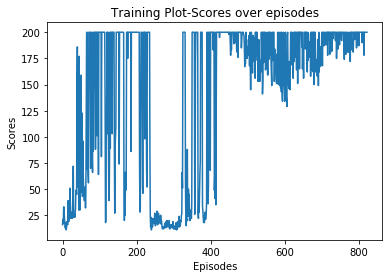

In [28]:
learning_rate=0.01
learning_rate_decay=0.01
exploration_rate=1
min_exploration_rate=0.01
exploration_rate_decay=0.995
gamma=1
nWinTicks=195
nEpisodes=1000
batchSize=64
env=gym.make('CartPole-v0')
dqnetwork=trainQ(learning_rate,learning_rate_decay,exploration_rate,min_exploration_rate,exploration_rate_decay,gamma,nWinTicks,nEpisodes,batchSize)
#testQ(dqnetwork)

## Observations:

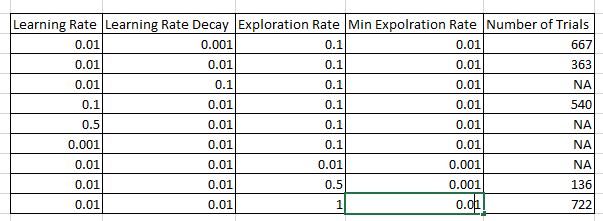

From the above table, it can be concluded that for a constant learning rate = 0.01 and exploration rate = 0.1, the agent is not able to balance pendulum for 200 time steps for 100 consecutive iterations as the learning rate decay increases. For a constant exploration rate, pendulum gets balanced for learning rate=0.1. The goal is not reached for learning rate greater or less than 0.1. Pendulum gets balanced for higher exploration rate.